In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"




In [2]:
# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
# city_data.head(5)


ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset

citymerge = pd.merge(ride_data, city_data, on="city") 


# Display the data table for preview

citymerge_df = pd.DataFrame(citymerge)
citymerge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
ruralonly = citymerge_df['type']=="Rural"
# print(ruralonly)

city_rural = citymerge_df[ruralonly]
# print(city_rural)

ruralgroup = city_rural.groupby(["city"])
# ruralgroup.describe()

avgfarerural = ruralgroup.mean()["fare"]
# print(avgfarerural)

totalnumridespercity_rural = ruralgroup.count()["fare"]
# print(totalnumridespercity_rural)

totalnumdriverpercity_rural = ruralgroup.mean()["driver_count"]
# print(totalnumdriverpercity_rural)


suburbanonly = citymerge_df['type']=="Suburban"
# print(suburbanonly)
city_suburban = citymerge_df[suburbanonly]
# print(city_suburban)

suburbangroup = city_suburban.groupby(["city"])
# suburbangroup.describe()

avgfaresuburban = suburbangroup.mean()["fare"]
# print(avgfaresuburban)

totalnumridespercity_suburban = suburbangroup.count()["fare"]
# print(totalnumridespercity_suburban)

totalnumdriverpercity_suburban = suburbangroup.mean()["driver_count"]
# print(totalnumdriverpercity_suburban)


urbanonly = citymerge_df['type']=="Urban"
# print(urbanonly)
city_urban = citymerge_df[urbanonly]
# print(city_urban)

urbangroup = city_urban.groupby(["city"])
# urbangroup.describe()

avgfareurban = urbangroup.mean()["fare"]
# print(avgfareurban)

totalnumridespercity_urban = urbangroup.count()["fare"]
# print(totalnumridespercity_urban)

totalnumdriverpercity_urban = urbangroup.mean()["driver_count"]
# print(totalnumdriverpercity_urban)












## Bubble Plot of Ride Sharing Data

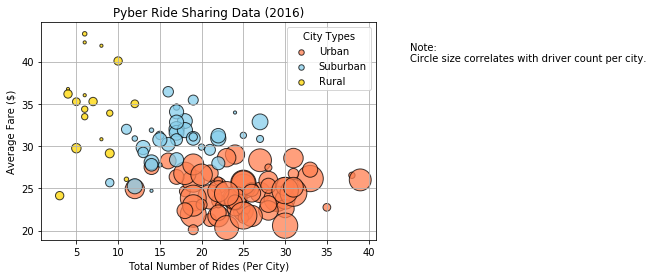

In [4]:
# Obtain the x and y coordinates for each of the three city types
x_limit = 45
x_axis = np.arange(0, x_limit, 1)

y_limit = 50
y_axis = np.arange(0, x_limit, 1)



# Build the scatter plots for each city types

plt.figure()
plt.scatter(totalnumridespercity_urban, avgfareurban, marker="o", label='Urban', facecolors="coral", edgecolors="black", s=totalnumdriverpercity_urban*10, alpha=0.75)
plt.scatter(totalnumridespercity_suburban, avgfaresuburban, marker="o", label='Suburban', facecolors="SkyBlue", edgecolors="black", s=totalnumdriverpercity_suburban*10, alpha=0.75)
plt.scatter(totalnumridespercity_rural, avgfarerural, marker="o", label='Rural', facecolors="gold", edgecolors="black", s=totalnumdriverpercity_rural*10, alpha=0.75)




# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


plt.grid()

# Create a legend

lgnd = plt.legend(loc="upper right", title="City Types", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(45,40,"Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("../Images/PyberScatterPlot.png")
plt.show()








## Total Fares by City Type

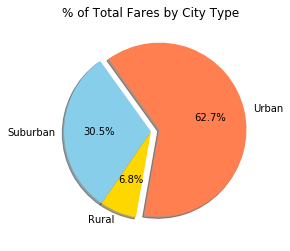

In [5]:
# ruralgroup.describe()

totalfarerural = ruralgroup.sum()["fare"]
totaloverallfarerural = totalfarerural.sum()
# print(totaloverallfarerural)

totalfaresuburban = suburbangroup.sum()["fare"]
totaloverallfaresuburban = totalfaresuburban.sum()
# print(totaloverallfaresuburban)

totalfareurban = urbangroup.sum()["fare"]
totaloverallfareurban = totalfareurban.sum()
# print(totaloverallfareurban)


totalfare = citymerge_df.sum()["fare"]
# print(totalfare)


urbanfareperc = (totaloverallfareurban/totalfare)*100
urbanfareperc = ("{:.1f}".format(urbanfareperc))
# print(urbanfareperc)

suburbanfareperc = (totaloverallfaresuburban/totalfare)*100
suburbanfareperc = ("{:.1f}".format(suburbanfareperc))
# print(suburbanfareperc)

ruralfareperc = (totaloverallfarerural/totalfare)*100
ruralfareperc = ("{:.1f}".format(ruralfareperc))
# print(ruralfareperc)

labels = ["Urban", "Suburban", "Rural"]
sizes = [urbanfareperc, suburbanfareperc, ruralfareperc]
colors = ["coral", "SkyBlue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Fares by City Type")
plt.savefig("../Images/PyberPieChart-FaresByCityType.png")
plt.show()








## Total Rides by City Type

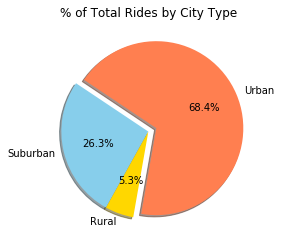

In [6]:
# Calculate Type Percents

# print(len(city_rural))
# print(len(city_suburban))
# print(len(city_urban))
# print(len(citymerge_df))

ruralridesperc = (len(city_rural))/(len(citymerge_df))*100
ruralridesperc = ("{:.1f}".format(ruralridesperc))
# print(ruralridesperc)

suburbanridesperc = (len(city_suburban))/(len(citymerge_df))*100
suburbanridesperc = ("{:.1f}".format(suburbanridesperc))
# print(suburbanridesperc)

urbanridesperc = (len(city_urban))/(len(citymerge_df))*100 
urbanridesperc = ("{:.1f}".format(urbanridesperc))
# print(urbanridesperc)

# Build Pie Chart


labels = ["Urban", "Suburban", "Rural"]
sizes = [urbanridesperc, suburbanridesperc, ruralridesperc]
colors = ["coral", "SkyBlue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")
plt.savefig("../Images/PyberPieChart-RidesByCityType.png")
plt.show()

# Save Figure

## Total Drivers by City Type

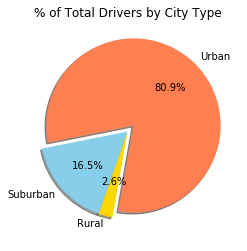

In [7]:
# Calculate Driver Percents

# ruralgroup.describe()

totaldriverrural = ruralgroup.mean()["driver_count"]
# print(totaldriverrural)
totaloveralldriverrural = totaldriverrural.sum()
# print(totaloveralldriverrural)

totaldriversuburban = suburbangroup.mean()["driver_count"]
# print(totaldriversuburban)
totaloveralldriversuburban = totaldriversuburban.sum()
# print(totaloveralldriversuburban)

totaldriverurban = urbangroup.mean()["driver_count"]
# print(totaldriverurban)
totaloveralldriverurban = totaldriverurban.sum()
# print(totaloveralldriverurban)

totaldriver = (totaloveralldriverrural) + (totaloveralldriversuburban) + (totaloveralldriverurban)
# print(totaldriver)

ruraldriverperc = (totaloveralldriverrural/totaldriver)*100
ruraldriverperc = ("{:.1f}".format(ruraldriverperc))
# print(ruraldriverperc)

suburbandriverperc = (totaloveralldriversuburban/totaldriver)*100
suburbandriverperc = ("{:.1f}".format(suburbandriverperc))
# print(suburbandriverperc)

urbandriverperc = (totaloveralldriverurban/totaldriver)*100
urbandriverperc = ("{:.1f}".format(urbandriverperc))
# print(urbandriverperc)



# Build Pie Charts

labels = ["Urban", "Suburban", "Rural"]
sizes = [urbandriverperc, suburbandriverperc, ruraldriverperc]
colors = ["coral", "SkyBlue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Drivers by City Type")
plt.savefig("../Images/PyberPieChart-DriversByCityType.png")
plt.show()



# Save Figure


In [ ]:
# Three Observable Trends:
    

#1) Overall, the average fare increases as you go from Urban, to Suburban, to Rural.

#2) Two of the top three "Urban" cities (South Karenland & North Jason) could use more drivers based on the demand of total rides provided.

#3) Urban cities, by a wide margin in total revenue, is the most important city type to Pyber.

